# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 : 
https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어
느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균) 
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
- https://www.mql5.com/ko/articles/11200

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 섭씨온도(input_data)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도는 ?'))
print('화씨온도는', celsisu_to_faherenheit(input_c))

섭씨온도는 ?2
화씨온도는 35.6


# 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성 (inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류...)
- 3. 모델 구성
- 4. 모델 학습 과정 설정 (손실함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 평가 (모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기)
## 2.1 노이즈가 없는 데이터로 실습

In [4]:
# 1. 데이터 생성
data_c = np.arange(100)
data_c # 독립변수

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_f = celsisu_to_faherenheit(data_c)
data_f # 종속변수 (타겟변수, output_data)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [20]:
# 데이터 전처리 : 컴퓨터에게 학습시키기 위해서 스케일을 맞춤(전체의 편차를 비슷하게)
scaled_data_c = data_c/100 # 0~1 사이로 맞추기 
scaled_data_f = data_f/100 # 0~1 사이로 맞추기

In [7]:
# GPU 사용 여부 확인 
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
# 3. 모델 구성
# pip install tensorflow==2.10
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense      # 입력값과 출력값으로 layer 층 지정 

model = Sequential()
# model.add(Input(shape=1))
model.add(Dense(1, # 종속(타겟, 출력)변수의 갯수
               input_shape=(1,) # 독립(입력)변수의 shape
               )) # 모델에 layer를 추가 (Dense(1) layer하나)

In [22]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae']) # metrics는[]로 그래프그릴시 loss / metrics는 다른함수사용 
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# 학습하기 전 예측
model.predict(np.array([[0], # 2개를 예측하려면 2차원으로 넣어야함
                       [0.01]]))

1/1 [==============================] - 0s 39ms/step


array([[0.        ],
       [0.00374684]], dtype=float32)

In [24]:
model.save('model/before_learning.h5')

In [25]:
# 5. 학습시키기
hist = model.fit(scaled_data_c, # 독립변수 (훈련데이터)
                scaled_data_f, # 종속변수 (훈련데이터)
                epochs=1000, # 학습 횟수
                verbose=2 # 학습시 출력 여부
                )

Epoch 1/1000
4/4 - 0s - loss: 1.2101 - mae: 1.0208 - 274ms/epoch - 69ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.1854 - mae: 1.0093 - 20ms/epoch - 5ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.1676 - mae: 1.0011 - 17ms/epoch - 4ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.1524 - mae: 0.9940 - 17ms/epoch - 4ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.1386 - mae: 0.9876 - 17ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.1252 - mae: 0.9812 - 15ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.1122 - mae: 0.9750 - 17ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.1000 - mae: 0.9694 - 18ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.0876 - mae: 0.9633 - 16ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 1.0752 - mae: 0.9573 - 16ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.0630 - mae: 0.9513 - 17ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 1.0507 - mae: 0.9455 - 17ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 1.0381 - mae: 0.9394 - 16ms/epoch - 4ms/step
Epoch 14/1000
4/4 -

4/4 - 0s - loss: 0.2334 - mae: 0.4001 - 17ms/epoch - 4ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.2290 - mae: 0.3957 - 17ms/epoch - 4ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.2240 - mae: 0.3910 - 15ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.2186 - mae: 0.3858 - 17ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.2134 - mae: 0.3808 - 18ms/epoch - 4ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.2085 - mae: 0.3760 - 11ms/epoch - 3ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.2039 - mae: 0.3715 - 10ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.1990 - mae: 0.3665 - 1ms/epoch - 350us/step
Epoch 117/1000
4/4 - 0s - loss: 0.1946 - mae: 0.3623 - 18ms/epoch - 5ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.1914 - mae: 0.3589 - 15ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.1873 - mae: 0.3550 - 17ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.1829 - mae: 0.3506 - 17ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.1787 - mae: 0.3461 - 17ms/epoch - 4ms/step
Epoch 122/100

Epoch 216/1000
4/4 - 0s - loss: 0.0322 - mae: 0.1551 - 12ms/epoch - 3ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.0320 - mae: 0.1543 - 13ms/epoch - 3ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0317 - mae: 0.1538 - 0s/epoch - 0s/step
Epoch 219/1000
4/4 - 0s - loss: 0.0315 - mae: 0.1533 - 4ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0311 - mae: 0.1524 - 15ms/epoch - 4ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0309 - mae: 0.1518 - 16ms/epoch - 4ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0306 - mae: 0.1511 - 16ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0303 - mae: 0.1503 - 18ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0299 - mae: 0.1495 - 14ms/epoch - 4ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0296 - mae: 0.1486 - 0s/epoch - 0s/step
Epoch 226/1000
4/4 - 0s - loss: 0.0293 - mae: 0.1477 - 4ms/epoch - 1ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0289 - mae: 0.1469 - 14ms/epoch - 3ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0286 - mae: 0.1460 - 17ms/epoch - 4ms/step
Epoch 2

Epoch 323/1000
4/4 - 0s - loss: 0.0063 - mae: 0.0684 - 14ms/epoch - 4ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.0062 - mae: 0.0678 - 14ms/epoch - 4ms/step
Epoch 325/1000
4/4 - 0s - loss: 0.0060 - mae: 0.0671 - 14ms/epoch - 4ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.0059 - mae: 0.0662 - 14ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0057 - mae: 0.0654 - 14ms/epoch - 3ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0056 - mae: 0.0647 - 12ms/epoch - 3ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0054 - mae: 0.0637 - 15ms/epoch - 4ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0053 - mae: 0.0628 - 14ms/epoch - 3ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0051 - mae: 0.0619 - 13ms/epoch - 3ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0050 - mae: 0.0610 - 14ms/epoch - 4ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0049 - mae: 0.0602 - 15ms/epoch - 4ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0048 - mae: 0.0594 - 14ms/epoch - 3ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0046 - mae: 0.0588 - 15ms/epoch - 4ms/step

Epoch 427/1000
4/4 - 0s - loss: 3.7068e-07 - mae: 5.8575e-04 - 14ms/epoch - 3ms/step
Epoch 428/1000
4/4 - 0s - loss: 2.6288e-07 - mae: 4.9995e-04 - 13ms/epoch - 3ms/step
Epoch 429/1000
4/4 - 0s - loss: 5.6232e-07 - mae: 7.2865e-04 - 14ms/epoch - 4ms/step
Epoch 430/1000
4/4 - 0s - loss: 8.2480e-07 - mae: 8.8695e-04 - 14ms/epoch - 4ms/step
Epoch 431/1000
4/4 - 0s - loss: 7.9485e-07 - mae: 8.4971e-04 - 15ms/epoch - 4ms/step
Epoch 432/1000
4/4 - 0s - loss: 1.7595e-07 - mae: 4.1073e-04 - 10ms/epoch - 2ms/step
Epoch 433/1000
4/4 - 0s - loss: 4.9618e-07 - mae: 6.8140e-04 - 17ms/epoch - 4ms/step
Epoch 434/1000
4/4 - 0s - loss: 4.1849e-07 - mae: 6.1926e-04 - 17ms/epoch - 4ms/step
Epoch 435/1000
4/4 - 0s - loss: 1.3067e-06 - mae: 0.0011 - 8ms/epoch - 2ms/step
Epoch 436/1000
4/4 - 0s - loss: 2.3899e-07 - mae: 4.7867e-04 - 16ms/epoch - 4ms/step
Epoch 437/1000
4/4 - 0s - loss: 2.6174e-07 - mae: 4.9657e-04 - 17ms/epoch - 4ms/step
Epoch 438/1000
4/4 - 0s - loss: 7.1955e-07 - mae: 8.1936e-04 - 17ms/ep

Epoch 525/1000
4/4 - 0s - loss: 7.5068e-07 - mae: 8.4676e-04 - 17ms/epoch - 4ms/step
Epoch 526/1000
4/4 - 0s - loss: 4.1729e-07 - mae: 6.2651e-04 - 15ms/epoch - 4ms/step
Epoch 527/1000
4/4 - 0s - loss: 7.7732e-07 - mae: 8.5644e-04 - 16ms/epoch - 4ms/step
Epoch 528/1000
4/4 - 0s - loss: 9.3333e-07 - mae: 9.1125e-04 - 0s/epoch - 0s/step
Epoch 529/1000
4/4 - 0s - loss: 1.6049e-07 - mae: 3.8480e-04 - 9ms/epoch - 2ms/step
Epoch 530/1000
4/4 - 0s - loss: 2.8164e-07 - mae: 5.0276e-04 - 7ms/epoch - 2ms/step
Epoch 531/1000
4/4 - 0s - loss: 1.3277e-06 - mae: 0.0011 - 17ms/epoch - 4ms/step
Epoch 532/1000
4/4 - 0s - loss: 6.1569e-07 - mae: 7.4724e-04 - 18ms/epoch - 4ms/step
Epoch 533/1000
4/4 - 0s - loss: 1.3808e-07 - mae: 3.6261e-04 - 16ms/epoch - 4ms/step
Epoch 534/1000
4/4 - 0s - loss: 6.4073e-07 - mae: 7.7506e-04 - 17ms/epoch - 4ms/step
Epoch 535/1000
4/4 - 0s - loss: 1.0440e-06 - mae: 9.8779e-04 - 16ms/epoch - 4ms/step
Epoch 536/1000
4/4 - 0s - loss: 1.0182e-07 - mae: 3.1325e-04 - 8ms/epoch -

Epoch 623/1000
4/4 - 0s - loss: 6.1635e-07 - mae: 7.6498e-04 - 17ms/epoch - 4ms/step
Epoch 624/1000
4/4 - 0s - loss: 3.4403e-07 - mae: 5.7534e-04 - 17ms/epoch - 4ms/step
Epoch 625/1000
4/4 - 0s - loss: 3.8668e-07 - mae: 6.0615e-04 - 17ms/epoch - 4ms/step
Epoch 626/1000
4/4 - 0s - loss: 1.3699e-06 - mae: 0.0011 - 5ms/epoch - 1ms/step
Epoch 627/1000
4/4 - 0s - loss: 1.7522e-07 - mae: 3.8170e-04 - 17ms/epoch - 4ms/step
Epoch 628/1000
4/4 - 0s - loss: 2.0470e-07 - mae: 4.3180e-04 - 17ms/epoch - 4ms/step
Epoch 629/1000
4/4 - 0s - loss: 8.1132e-07 - mae: 8.6474e-04 - 17ms/epoch - 4ms/step
Epoch 630/1000
4/4 - 0s - loss: 7.0316e-07 - mae: 8.1872e-04 - 17ms/epoch - 4ms/step
Epoch 631/1000
4/4 - 0s - loss: 7.5406e-07 - mae: 8.2164e-04 - 17ms/epoch - 4ms/step
Epoch 632/1000
4/4 - 0s - loss: 1.5652e-07 - mae: 3.8472e-04 - 5ms/epoch - 1ms/step
Epoch 633/1000
4/4 - 0s - loss: 4.7109e-08 - mae: 2.0102e-04 - 17ms/epoch - 4ms/step
Epoch 634/1000
4/4 - 0s - loss: 1.2382e-06 - mae: 0.0011 - 17ms/epoch -

4/4 - 0s - loss: 1.2135e-06 - mae: 8.9146e-04 - 15ms/epoch - 4ms/step
Epoch 721/1000
4/4 - 0s - loss: 2.3342e-08 - mae: 1.3898e-04 - 13ms/epoch - 3ms/step
Epoch 722/1000
4/4 - 0s - loss: 2.1684e-08 - mae: 1.4062e-04 - 4ms/epoch - 904us/step
Epoch 723/1000
4/4 - 0s - loss: 2.2281e-07 - mae: 4.2249e-04 - 7ms/epoch - 2ms/step
Epoch 724/1000
4/4 - 0s - loss: 1.6729e-06 - mae: 0.0013 - 10ms/epoch - 2ms/step
Epoch 725/1000
4/4 - 0s - loss: 4.3216e-07 - mae: 6.1865e-04 - 17ms/epoch - 4ms/step
Epoch 726/1000
4/4 - 0s - loss: 2.2291e-07 - mae: 4.5535e-04 - 15ms/epoch - 4ms/step
Epoch 727/1000
4/4 - 0s - loss: 6.4752e-07 - mae: 7.7535e-04 - 13ms/epoch - 3ms/step
Epoch 728/1000
4/4 - 0s - loss: 5.7491e-07 - mae: 7.4439e-04 - 17ms/epoch - 4ms/step
Epoch 729/1000
4/4 - 0s - loss: 8.8744e-07 - mae: 9.0117e-04 - 6ms/epoch - 2ms/step
Epoch 730/1000
4/4 - 0s - loss: 4.0394e-07 - mae: 6.1426e-04 - 10ms/epoch - 2ms/step
Epoch 731/1000
4/4 - 0s - loss: 4.0553e-07 - mae: 6.1835e-04 - 17ms/epoch - 4ms/step


Epoch 818/1000
4/4 - 0s - loss: 7.4749e-07 - mae: 8.4757e-04 - 18ms/epoch - 4ms/step
Epoch 819/1000
4/4 - 0s - loss: 4.2208e-07 - mae: 6.3440e-04 - 14ms/epoch - 3ms/step
Epoch 820/1000
4/4 - 0s - loss: 8.4566e-07 - mae: 9.0135e-04 - 18ms/epoch - 4ms/step
Epoch 821/1000
4/4 - 0s - loss: 5.0651e-07 - mae: 6.9772e-04 - 17ms/epoch - 4ms/step
Epoch 822/1000
4/4 - 0s - loss: 6.1441e-07 - mae: 7.6971e-04 - 16ms/epoch - 4ms/step
Epoch 823/1000
4/4 - 0s - loss: 3.0379e-07 - mae: 5.3601e-04 - 17ms/epoch - 4ms/step
Epoch 824/1000
4/4 - 0s - loss: 2.8947e-07 - mae: 5.1004e-04 - 2ms/epoch - 606us/step
Epoch 825/1000
4/4 - 0s - loss: 1.0909e-06 - mae: 0.0010 - 1ms/epoch - 306us/step
Epoch 826/1000
4/4 - 0s - loss: 6.0897e-07 - mae: 7.5009e-04 - 7ms/epoch - 2ms/step
Epoch 827/1000
4/4 - 0s - loss: 6.7857e-07 - mae: 8.0345e-04 - 12ms/epoch - 3ms/step
Epoch 828/1000
4/4 - 0s - loss: 1.6597e-07 - mae: 3.9840e-04 - 21ms/epoch - 5ms/step
Epoch 829/1000
4/4 - 0s - loss: 6.9749e-07 - mae: 8.0779e-04 - 13ms/

4/4 - 0s - loss: 2.1094e-07 - mae: 4.4606e-04 - 17ms/epoch - 4ms/step
Epoch 916/1000
4/4 - 0s - loss: 9.1871e-07 - mae: 9.2882e-04 - 17ms/epoch - 4ms/step
Epoch 917/1000
4/4 - 0s - loss: 3.2168e-07 - mae: 5.5744e-04 - 15ms/epoch - 4ms/step
Epoch 918/1000
4/4 - 0s - loss: 6.1587e-07 - mae: 7.7048e-04 - 13ms/epoch - 3ms/step
Epoch 919/1000
4/4 - 0s - loss: 1.1218e-06 - mae: 0.0010 - 14ms/epoch - 3ms/step
Epoch 920/1000
4/4 - 0s - loss: 1.2216e-07 - mae: 3.3800e-04 - 11ms/epoch - 3ms/step
Epoch 921/1000
4/4 - 0s - loss: 2.0027e-07 - mae: 4.2940e-04 - 12ms/epoch - 3ms/step
Epoch 922/1000
4/4 - 0s - loss: 1.2122e-06 - mae: 0.0011 - 12ms/epoch - 3ms/step
Epoch 923/1000
4/4 - 0s - loss: 6.3003e-07 - mae: 7.6294e-04 - 7ms/epoch - 2ms/step
Epoch 924/1000
4/4 - 0s - loss: 6.4758e-08 - mae: 2.4935e-04 - 17ms/epoch - 4ms/step
Epoch 925/1000
4/4 - 0s - loss: 4.3087e-07 - mae: 6.2666e-04 - 16ms/epoch - 4ms/step
Epoch 926/1000
4/4 - 0s - loss: 1.5682e-06 - mae: 0.0012 - 14ms/epoch - 3ms/step
Epoch 92

In [26]:
# 6. 모델 평가(시험 데이터 셋으로 모델 평가)
hist.history.keys()

dict_keys(['loss', 'mae'])

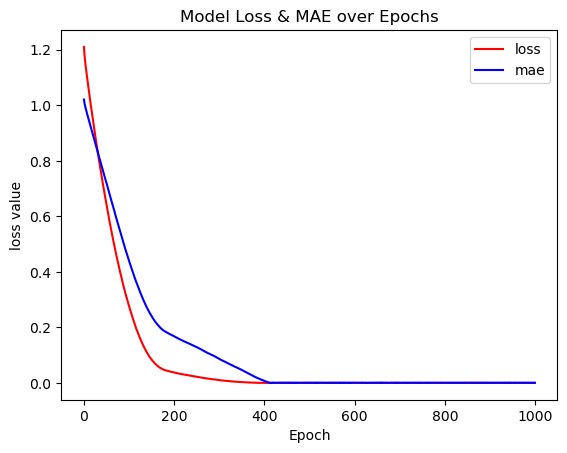

In [27]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('Epoch') # 학습횟수
plt.ylabel('loss value') # predict값 - target값
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [28]:
# 7. 모델 사용하기
model.predict(np.array([[0],
                      [0.01]]))

1/1 [==============================] - 0s 20ms/step


array([[0.3199258 ],
       [0.33792207]], dtype=float32)

In [19]:
scaled_data_f

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [29]:
model.save('model/after_learning.h5')

In [36]:
# 실제값 : scaled_data_f
# 예측값 : y_hat
y_hat = model.predict([scaled_data_c])
for y, h in zip(scaled_data_f, y_hat):
    print('실제값:{}, 예측값:{}'.format(round(y*100, 1), 
                                  round(h[0]*100, 1)))

4/4 [==============================] - 0s 2ms/step
실제값:32.0, 예측값:32.0
실제값:33.8, 예측값:33.8
실제값:35.6, 예측값:35.6
실제값:37.4, 예측값:37.4
실제값:39.2, 예측값:39.2
실제값:41.0, 예측값:41.0
실제값:42.8, 예측값:42.8
실제값:44.6, 예측값:44.6
실제값:46.4, 예측값:46.4
실제값:48.2, 예측값:48.2
실제값:50.0, 예측값:50.0
실제값:51.8, 예측값:51.8
실제값:53.6, 예측값:53.6
실제값:55.4, 예측값:55.4
실제값:57.2, 예측값:57.2
실제값:59.0, 예측값:59.0
실제값:60.8, 예측값:60.8
실제값:62.6, 예측값:62.6
실제값:64.4, 예측값:64.4
실제값:66.2, 예측값:66.2
실제값:68.0, 예측값:68.0
실제값:69.8, 예측값:69.8
실제값:71.6, 예측값:71.6
실제값:73.4, 예측값:73.4
실제값:75.2, 예측값:75.2
실제값:77.0, 예측값:77.0
실제값:78.8, 예측값:78.8
실제값:80.6, 예측값:80.6
실제값:82.4, 예측값:82.4
실제값:84.2, 예측값:84.2
실제값:86.0, 예측값:86.0
실제값:87.8, 예측값:87.8
실제값:89.6, 예측값:89.6
실제값:91.4, 예측값:91.4
실제값:93.2, 예측값:93.2
실제값:95.0, 예측값:95.0
실제값:96.8, 예측값:96.8
실제값:98.6, 예측값:98.6
실제값:100.4, 예측값:100.4
실제값:102.2, 예측값:102.2
실제값:104.0, 예측값:104.0
실제값:105.8, 예측값:105.8
실제값:107.6, 예측값:107.6
실제값:109.4, 예측값:109.4
실제값:111.2, 예측값:111.2
실제값:113.0, 예측값:113.0
실제값:114.8, 예측값:114.8
실제값:116.6, 예측값:116.6
실제값:118.4, 예측값:11

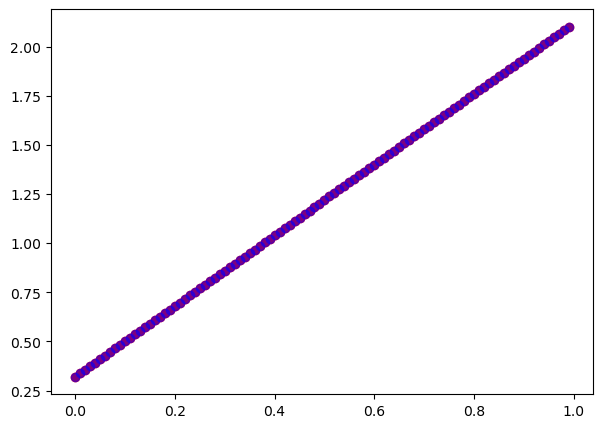

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r')
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='b', alpha=0.5)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [42]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(7)
noise = np.random.normal(loc=0, scale=0.1, size=100)
# print(noise)
# print(scaled_data_f)
scaled_data_f = scaled_data_f+noise

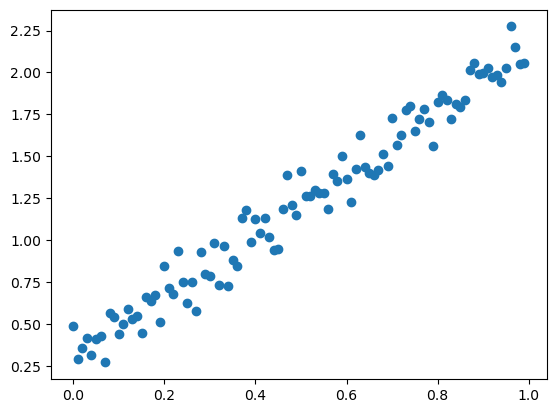

In [43]:
plt.scatter(x=scaled_data_c, y=scaled_data_f)
plt.show()

In [45]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))

# 4. 모델 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_c, scaled_data_f, epochs=1000, verbose=2)
hist2

Epoch 1/1000
4/4 - 0s - loss: 2.3154 - mae: 1.3808 - 300ms/epoch - 75ms/step
Epoch 2/1000
4/4 - 0s - loss: 2.2846 - mae: 1.3708 - 20ms/epoch - 5ms/step
Epoch 3/1000
4/4 - 0s - loss: 2.2609 - mae: 1.3627 - 0s/epoch - 0s/step
Epoch 4/1000
4/4 - 0s - loss: 2.2397 - mae: 1.3558 - 14ms/epoch - 4ms/step
Epoch 5/1000
4/4 - 0s - loss: 2.2184 - mae: 1.3484 - 15ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 2.1995 - mae: 1.3419 - 16ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 2.1824 - mae: 1.3362 - 16ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 2.1645 - mae: 1.3300 - 17ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 2.1471 - mae: 1.3240 - 18ms/epoch - 5ms/step
Epoch 10/1000
4/4 - 0s - loss: 2.1311 - mae: 1.3183 - 15ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 2.1138 - mae: 1.3124 - 17ms/epoch - 4ms/step
Epoch 12/1000
4/4 - 0s - loss: 2.0957 - mae: 1.3061 - 16ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 2.0787 - mae: 1.3000 - 10ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s

4/4 - 0s - loss: 0.8224 - mae: 0.7549 - 972us/epoch - 243us/step
Epoch 110/1000
4/4 - 0s - loss: 0.8118 - mae: 0.7494 - 9ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.8023 - mae: 0.7445 - 1ms/epoch - 254us/step
Epoch 112/1000
4/4 - 0s - loss: 0.7921 - mae: 0.7390 - 12ms/epoch - 3ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.7827 - mae: 0.7339 - 14ms/epoch - 3ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.7738 - mae: 0.7292 - 4ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.7652 - mae: 0.7247 - 17ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.7549 - mae: 0.7191 - 17ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.7447 - mae: 0.7134 - 17ms/epoch - 4ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.7353 - mae: 0.7082 - 0s/epoch - 0s/step
Epoch 119/1000
4/4 - 0s - loss: 0.7278 - mae: 0.7040 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 0.7184 - mae: 0.6988 - 0s/epoch - 0s/step
Epoch 121/1000
4/4 - 0s - loss: 0.7099 - mae: 0.6939 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s 

Epoch 216/1000
4/4 - 0s - loss: 0.1883 - mae: 0.3679 - 17ms/epoch - 4ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.1859 - mae: 0.3659 - 15ms/epoch - 4ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.1834 - mae: 0.3639 - 16ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.1818 - mae: 0.3625 - 0s/epoch - 0s/step
Epoch 220/1000
4/4 - 0s - loss: 0.1792 - mae: 0.3604 - 0s/epoch - 0s/step
Epoch 221/1000
4/4 - 0s - loss: 0.1769 - mae: 0.3585 - 2ms/epoch - 435us/step
Epoch 222/1000
4/4 - 0s - loss: 0.1752 - mae: 0.3571 - 26ms/epoch - 6ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.1736 - mae: 0.3558 - 8ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.1715 - mae: 0.3539 - 16ms/epoch - 4ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.1695 - mae: 0.3523 - 17ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.1672 - mae: 0.3502 - 18ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.1659 - mae: 0.3491 - 16ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.1641 - mae: 0.3473 - 15ms/epoch - 4ms/step
Epoch

Epoch 323/1000
4/4 - 0s - loss: 0.0942 - mae: 0.2592 - 17ms/epoch - 4ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.0935 - mae: 0.2582 - 0s/epoch - 0s/step
Epoch 325/1000
4/4 - 0s - loss: 0.0930 - mae: 0.2573 - 0s/epoch - 0s/step
Epoch 326/1000
4/4 - 0s - loss: 0.0925 - mae: 0.2569 - 17ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0919 - mae: 0.2558 - 17ms/epoch - 4ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0913 - mae: 0.2550 - 16ms/epoch - 4ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0908 - mae: 0.2543 - 17ms/epoch - 4ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0903 - mae: 0.2535 - 16ms/epoch - 4ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0897 - mae: 0.2526 - 17ms/epoch - 4ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0892 - mae: 0.2519 - 14ms/epoch - 3ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0887 - mae: 0.2512 - 0s/epoch - 0s/step
Epoch 334/1000
4/4 - 0s - loss: 0.0882 - mae: 0.2504 - 0s/epoch - 0s/step
Epoch 335/1000
4/4 - 0s - loss: 0.0876 - mae: 0.2496 - 12ms/epoch - 3ms/step
Epoch 336/1

4/4 - 0s - loss: 0.0474 - mae: 0.1818 - 17ms/epoch - 4ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.0470 - mae: 0.1810 - 17ms/epoch - 4ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.0466 - mae: 0.1802 - 15ms/epoch - 4ms/step
Epoch 433/1000
4/4 - 0s - loss: 0.0463 - mae: 0.1795 - 18ms/epoch - 4ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.0459 - mae: 0.1788 - 17ms/epoch - 4ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0455 - mae: 0.1781 - 16ms/epoch - 4ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0451 - mae: 0.1773 - 13ms/epoch - 3ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0447 - mae: 0.1764 - 0s/epoch - 0s/step
Epoch 438/1000
4/4 - 0s - loss: 0.0443 - mae: 0.1757 - 1ms/epoch - 349us/step
Epoch 439/1000
4/4 - 0s - loss: 0.0440 - mae: 0.1752 - 17ms/epoch - 4ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.0437 - mae: 0.1746 - 16ms/epoch - 4ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0434 - mae: 0.1740 - 17ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0431 - mae: 0.1733 - 17ms/epoch - 4ms/step
Epoch 443/1000
4

4/4 - 0s - loss: 0.0204 - mae: 0.1169 - 17ms/epoch - 4ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0203 - mae: 0.1165 - 16ms/epoch - 4ms/step
Epoch 539/1000
4/4 - 0s - loss: 0.0201 - mae: 0.1160 - 17ms/epoch - 4ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0200 - mae: 0.1155 - 16ms/epoch - 4ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0199 - mae: 0.1152 - 16ms/epoch - 4ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0198 - mae: 0.1149 - 0s/epoch - 0s/step
Epoch 543/1000
4/4 - 0s - loss: 0.0196 - mae: 0.1143 - 0s/epoch - 0s/step
Epoch 544/1000
4/4 - 0s - loss: 0.0194 - mae: 0.1140 - 17ms/epoch - 4ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0193 - mae: 0.1135 - 16ms/epoch - 4ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0191 - mae: 0.1128 - 17ms/epoch - 4ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0189 - mae: 0.1124 - 16ms/epoch - 4ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1119 - 17ms/epoch - 4ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0186 - mae: 0.1114 - 14ms/epoch - 4ms/step
Epoch 550/1000
4/4 -

4/4 - 0s - loss: 0.0112 - mae: 0.0827 - 0s/epoch - 0s/step
Epoch 645/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0829 - 4ms/epoch - 973us/step
Epoch 646/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0826 - 15ms/epoch - 4ms/step
Epoch 647/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0828 - 16ms/epoch - 4ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0829 - 17ms/epoch - 4ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0827 - 18ms/epoch - 4ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0824 - 16ms/epoch - 4ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0824 - 16ms/epoch - 4ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0823 - 17ms/epoch - 4ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0821 - 17ms/epoch - 4ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0819 - 17ms/epoch - 4ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0819 - 17ms/epoch - 4ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0108 - mae: 0.0818 - 16ms/epoch - 4ms/step
Epoch 657/1000
4

4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 2ms/epoch - 575us/step
Epoch 752/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 753/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 15ms/epoch - 4ms/step
Epoch 754/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 15ms/epoch - 4ms/step
Epoch 758/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 14ms/epoch - 4ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 0s/epoch - 0s/step
Epoch 760/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 0s/epoch - 0s/step
Epoch 761/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 2ms/epoch - 380us/step
Epoch 762/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 18ms/epoch - 4ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0801 - 16ms/epoch - 4ms/step
Epoch 764/1000
4/4

Epoch 858/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 17ms/epoch - 4ms/step
Epoch 859/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 16ms/epoch - 4ms/step
Epoch 860/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 0s/epoch - 0s/step
Epoch 861/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 0s/epoch - 0s/step
Epoch 862/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 394us/epoch - 98us/step
Epoch 863/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 17ms/epoch - 4ms/step
Epoch 864/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 17ms/epoch - 4ms/step
Epoch 865/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 17ms/epoch - 4ms/step
Epoch 866/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 17ms/epoch - 4ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 869/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 870/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 14ms/epoch - 3ms/step
Epo

4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 966/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 14ms/epoch - 3ms/step
Epoch 967/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 14ms/epoch - 4ms/step
Epoch 968/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 0s/epoch - 0s/step
Epoch 969/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 970/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 17ms/epoch - 4ms/step
Epoch 971/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 972/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 17ms/epoch - 4ms/step
Epoch 973/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 17ms/epoch - 4ms/step
Epoch 974/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 17ms/epoch - 4ms/step
Epoch 975/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 976/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 0s/epoch - 0s/step
Epoch 977/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 676us/epoch - 169us/step
Epoch 978/1000
4/4 -

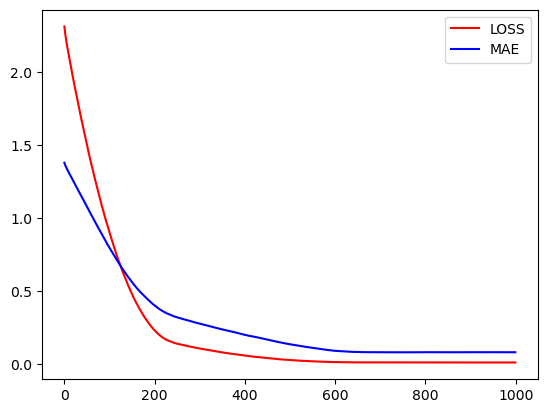

In [48]:
# 6. 평가하기
plt.plot(hist2.history['loss'], 'r', label='LOSS')
plt.plot(hist2.history['mae'], 'b', label='MAE')
plt.legend()
plt.show()

In [49]:
# 7. 예측하기
model2.predict(np.array([[0],
                         [0.01]]))

1/1 [==============================] - 0s 35ms/step


array([[0.30139512],
       [0.31973   ]], dtype=float32)

In [50]:
y_hat2 = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 2ms/step


In [51]:
for h, y in zip(y_hat2, scaled_data_f):
    print('예측:{}, 실제:{}'.format(h,
                                y))

예측:[0.30139512], 실제:0.48905257038003563
예측:[0.31973], 실제:0.2914062629459167
예측:[0.3380649], 실제:0.3592820163678585
예측:[0.3563998], 실제:0.4147516282996508
예측:[0.3747347], 실제:0.31310769713742614
예측:[0.39306962], 실제:0.4102065572905948
예측:[0.4114045], 실제:0.42791096141420687
예측:[0.42973942], 실제:0.2705275693654579
예측:[0.44807428], 실제:0.5657658005663493
예측:[0.4664092], 실제:0.542049851591955
예측:[0.4847441], 실제:0.43745710260332404
예측:[0.503079], 실제:0.5008451738804279
예측:[0.5214139], 실제:0.5865299374196752
예측:[0.5397488], 실제:0.5278643584808353
예측:[0.55808365], 실제:0.5477250921327455
예측:[0.57641864], 실제:0.44467585875092086
예측:[0.5947535], 실제:0.6634580311891888
예측:[0.61308837], 실제:0.6383880905287038
예측:[0.6314233], 실제:0.6714459923759963
예측:[0.64975816], 실제:0.509347546813016
예측:[0.6680931], 실제:0.8450699691186476
예측:[0.68642795], 실제:0.7134335535456359
예측:[0.7047629], 실제:0.6772860056713612
예측:[0.7230978], 실제:0.9369072220761113
예측:[0.74143267], 실제:0.7474613970139354
예측:[0.75976753], 실제:0.6249321300853425
예

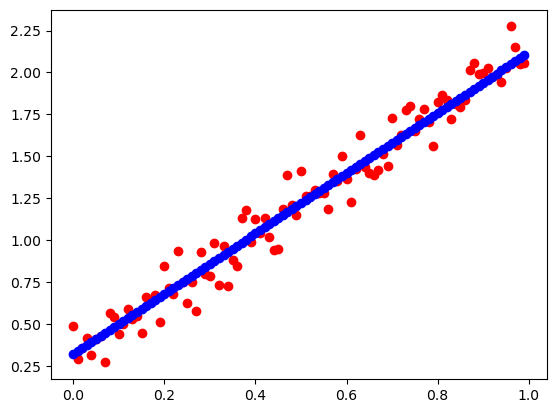

In [54]:
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r')
plt.scatter(x=scaled_data_c, y=y_hat, c='b')
plt.show()